In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

# Load the kc_tax dataset and filter based on a variety of criteria
kc_tax = pd.read_csv("./data/kc_tax.csv")
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]

lc_loans = pd.read_csv("https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/lc_loans.csv")
airline_stats = pd.read_csv("https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/airline_stats.csv")

## 정리

최근 어마어마한 계산 능력의 등장과 더불어, 시작에 비해 엄청난 발전을 이루었지만 예전에 개발된 주요 개념과 방법들은 여전히 이러한 시스템들의 기반이 된다.

- 육각형 구간이나 등고선 도표는 데이터의 방대한 양에 압도당하지 않으면서, 한번에 두 수치형 변수를 시각적으로 검토하기 위한 유용한 도구이다.
- 분할표는 두 범주형 변수의 도수를 확인하기 위한 표준 방법이다.
- 상자그림과 바이올린 도표는 범주형 변수와 수치형 변수 간의 관계를 도식화하기 위함 도구이다.

# 두 개 이상의 변수 탐색하기

1. 일변량분석 : 한 번에 하나의 변수 (평균과 분산)
2. 이변량분석 : 두 개의 변수 (상관분석)
3. 다변량분석 : 셋 이상의 변수

셋 이상의 변수를 다루는 다변량분석에 대해서 알아보자. 이때, 이변량분석 혹은 다변량 분석의 형태는 데이터가 수치형인지, 범주형인지, 데이터의 특성에 따라 달라진다.

## 수치형 변수 대 수치형 변수

산점도는 데이터 개수가 상대적으로 적을 때는 괜찮지만 수십, 수백만의 레코드를 나타내기에는 산점도의 점들이 너무 밀집되어 알아보기 어렵다는 단점이 있다. 따라서 이러한 관계를 나타내는 다른 방법이 필요하다.

- 육각형 구간
- 등고선

### 육각형 구간 : 두 변수를 육각형 모양의 구간으로 나눈 그림

점으로 표시하는 대신 기록값을 육각형 모양의 구간들로 나누고 각 구간에 포함된 기록값의 개수에 따라 색깔을 표시한다.

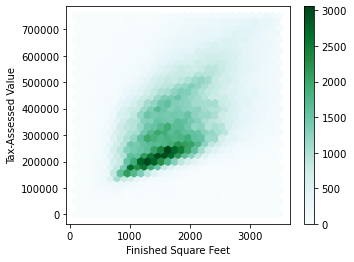

In [76]:
# gridsize : x방향의 육각형 수
# sharex : x축을 공유하고 x축 이름 보이게 설정
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=30, figsize=(5, 4), sharex=False)
# 이름 설정 가능
ax.set_xlabel("Finished Square Feet")
ax.set_ylabel("Tax-Assessed Value")

plt.show()

이 도표에서, 집의 크기와 과세 평가 금액이 양의 상관관계를 갖는 것을 쉽게 파악할 수 있다. 또한 주요 그룹 부분(가장 어둡고 아래쪽에 있는) 위쪽에 또 하나의 그룹이 있는 것을 볼 수 있다. 이 부분의 집들은 주요 그룹부분과 크기는 같은 집이지만 더 높은 과세 평가액을 갖는다.

### 등고선 : 지도상에 같은 높이의 지점을 등고선으로 나타내는 것처럼, 두 변수의 밀도를 등고선으로 표시한 도표

두 변수로 이루어진 지형에서의 등고선을 의미한다. 등고선 위의 점들은 밀도가 같다. "꼭대기" 쪽으로 갈수록 밀도는 높아진다.

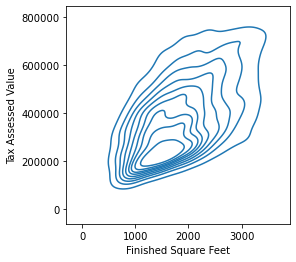

In [65]:
# 등고선
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.show()

두 수치형 변수의 관계를 나타내는 다른 도표로 히트맵이 있다. 히트맵, 육각 구간, 등고 도표 모두 이차원상의 밀도를 시각화하는 데 사용된다. 히스토그램이나 밀도 그림과 유사성을 찾을 수 있다.

## 범주형 변수 대 범주형 변수

- 분할표

### 분할표 : 두 가지 이상의 범주형 변수의 빈도수를 기록한 표

분할표는 두 범주형 변수를 요약하는 데 효과적인 방법으로, 범주별 빈도수를 기록한 표다. 피벗 테이블 기능을 활용하면 분할표를 손쉽게 얻을 수 있다. 또한, 각 열의 빈도나 전체 백분율을 볼 수 있다.

In [36]:
# 횟수 정보 = 빈도
# margins : 열과 행의 합계를 추가할 수 있음
lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [40]:
# 백분율 계산 = 비율
# 열 합계를 무시하고 피벗 테이블의 복사본을 만든다.
df = crosstab.copy().loc['A':'G',:]
# 행 합계로 행을 나눈다.
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
# "ALL"열을 총합으로 나눈다.
df['All'] = df['All'] / sum(df['All'])
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


높은 등급의 대출일수록 낮은 등급에 비해 연체나 삭제 비율이 매우 낮다는 것을 알 수 있다. 

## 범주형 변수 대 수치형 변수

- 상자그림
- 바이올린 도표

### 상자그림

범주형 변수에 따라 분류된 수치형 변수의 분포를 시각화하여 비교하는 간단한 방법이다.

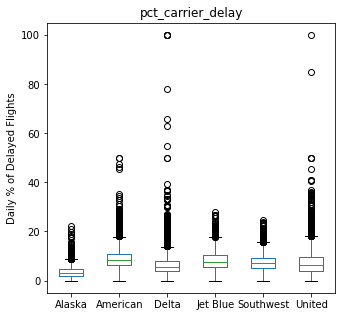

In [68]:
# 상자그림 - 5절 참고
# _Pandas_ boxplots of a column can be grouped by a different column.
# by로 데이터 집합을 그룹별로 분할하고 각 그룹의 상자그림을 생성
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5), grid=False)
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.show()

알래스카 항공의 지연이 가장 적었던 반면, 아메리카 항공의 항공 지연이 가장 많았던 것으로 보인다. 아메리카 항공의 낮은 사분위수가 알래스카 항공의 상위 사분위수보다도 높았다.

### 바이올린 도표 : 상자그림과 비슷하지만 밀도추정을 함께 보여준다.

상자그림을 보완한 형태, y축을 따라 밀도 추정 결과를 동시에 시각화한다. 밀도 분포 모양을 좌우대칭으로 서로 겹쳐지도록 해놓고 보면 바이올린을 닮은 모양이 된다. 바이올린 도표의 장점은 바로 상자그림에서는 보이지 않는 데이터 분포를 볼 수 있다는 점이다. 한편, 상자그림은 데이터의 특잇값들을 좀 더 명확하게 보여준다.

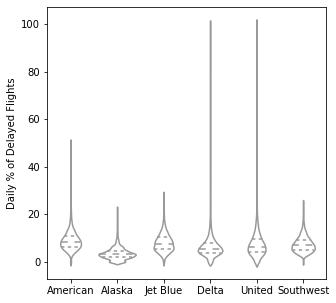

In [70]:
# 바이올린 도표
# inner : 바이올린 내부에서의 데이터 포인트 표현
# quartile : 사분위수
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.show()

알래스카 항공, 그리고 그보다는 적지만 델타 항공이 거의 0 근처에 데이터가 집중되어 있는 것을 볼 수 있다. 상자그림에서는 명확하게 드러나지 않는 현상이었다.

## 다변수 시각화하기

조건화라는 개념을 통해 두 변수 비교용 도표(산점도, 육각형 구간, 상자그림)를 더 여러 변수를 비교하는 용도로 확장하여 활용할 수도 있다.

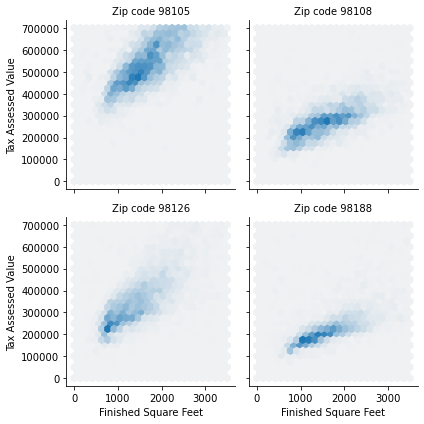

In [74]:
# 조건화 변수 = 우편번호
# 오.. 확실히 matplotlib 쓰니 이쁘긴 하구나!
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

# 조건 변수를 지정하려면 col 및 row 인수를 사용한다.
# 단일 조건 변수의 경우 col_wrap과 함께 col을 사용하여 패싯 그래프를 여러 행으로 래핑한다.
g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)

# map 메서드는 다른 우편번호에 대한 원래 데이터 집합의 서브셋에 대해 hexbin 함수를 호출한다.
# extent는 x축과 y축의 한계를 정의한다.
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])

g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.show()

어떤 우편번호에서의 평가액이 다른 두 군데보다 훨씬 높다는 것을 볼 수 있다. 이러한 불균형이 주요 그룹 위에 있던 서로 다른 그룹들을 설명 가능하게 한다.

그래픽스 시스템에서 조건화 변수라는 개념은 다양한 최신 그래픽스 시스템에 영향을 주었고 비즈니스 지능형 플랫폼에도 없어서는 안 될 중요한 요소가 되었다.